In [1]:
#importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Clustering Analysis on Mall Customers data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#Checking for null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

## Data Visualization

In [7]:
numerical_data = df.select_dtypes(include = ['int64', 'float64'])
numerical_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


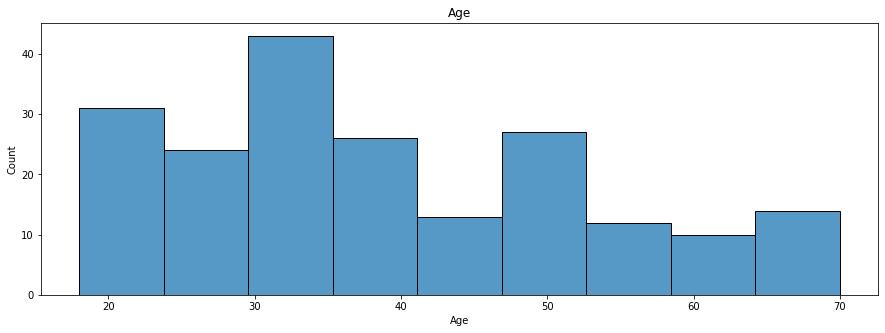

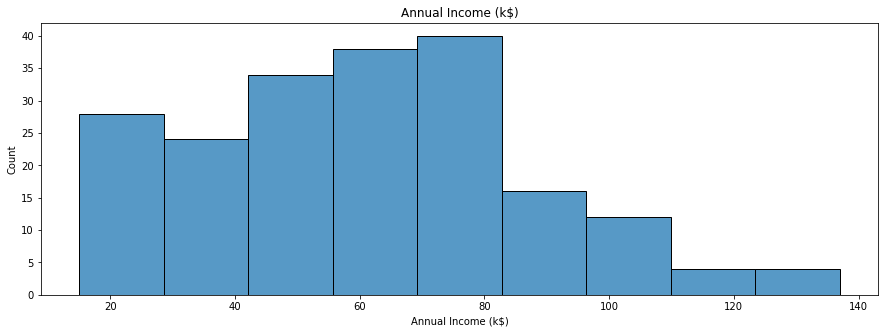

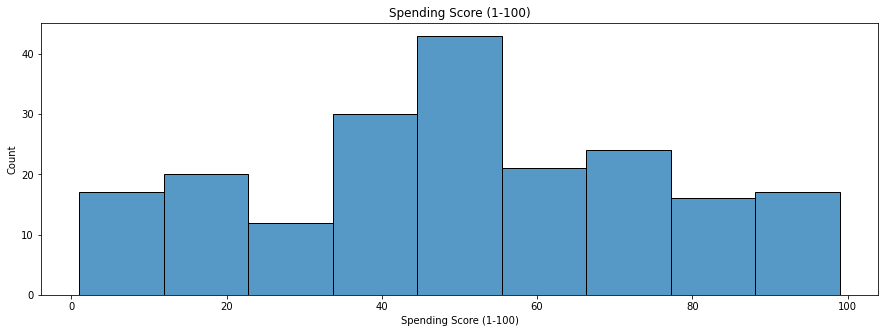

In [8]:
#Distribution of numerical data 
for col in numerical_data.columns:
    plt.figure(figsize=(15,5))
    plt.title(col)
    sns.histplot(numerical_data[col], bins = 'sturges')
    plt.show()

### The most regular customers have age between 30 - 35 
### Senior citizens and people younger than 20 are less

### Frequently visiting customers have a salary around 80K 
### The number of people having salary 100K and above are very less as compared. 

### Most people have a spending score between 40 - 50
### There is also a significant number of customers with spending amount above 70 


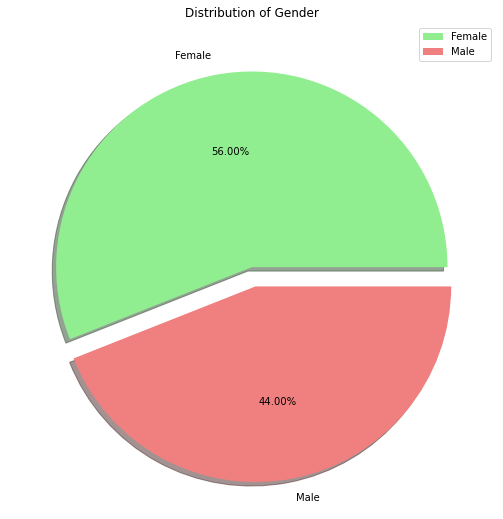

In [9]:
#Distibution of Gender 
plt.rcParams['figure.figsize'] = (9, 9)
gender_data = df['Gender'].value_counts()
explode = (0, 0.1)
labels = ["Female", "Male"]
colors = ['lightgreen', 'lightcoral']
plt.pie(gender_data, labels = labels, explode = explode, shadow = True, colors = colors, autopct = '%.2f%%')
plt.title("Distribution of Gender")
plt.legend()
plt.show()

### Hence, there are more female customers than male

## Bivariate Analysis

In [10]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


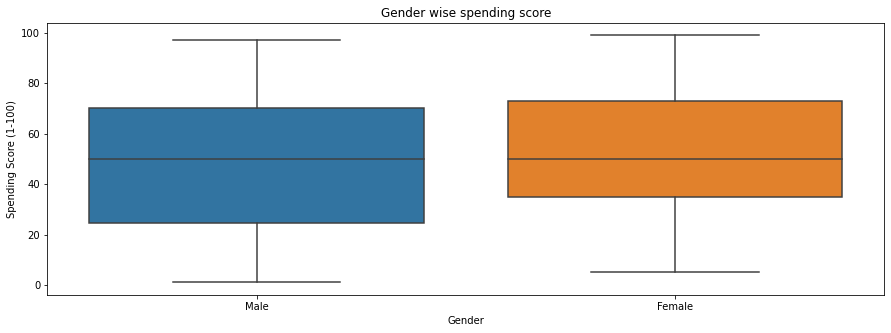

In [11]:
#Spending score gender wise 
plt.figure(figsize=(15,5))
plt.title("Gender wise spending score")
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = df)
plt.show()

### Men have a spending score range larger than women with the least being less than 25 and highest around 70
### Women however have between 35 and 80 
### However there are both men and women customers with score around 99 and also 1

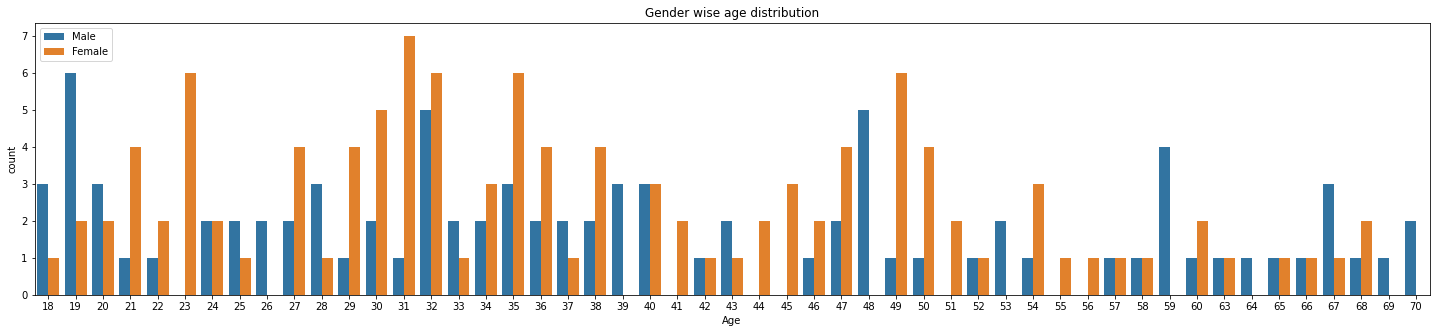

In [12]:
#Gender and age 
plt.figure(figsize=(25,5))
plt.title("Gender wise age distribution")
sns.countplot(x = 'Age', hue = 'Gender', data = df)
plt.legend()
plt.show()

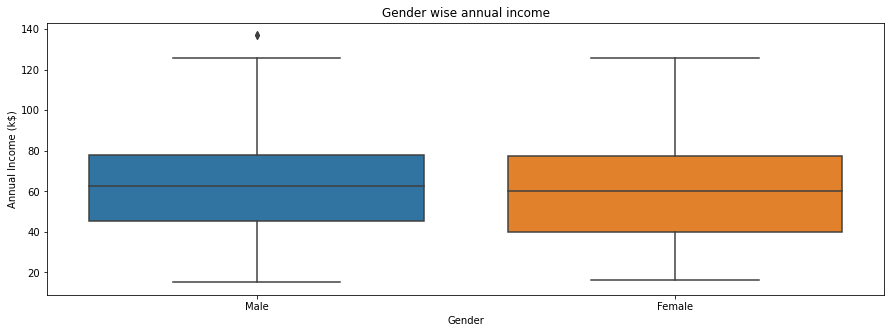

In [13]:
#Income score gender wise 
plt.figure(figsize=(15,5))
plt.title("Gender wise annual income")
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data = df)
plt.show()

## Correlation 

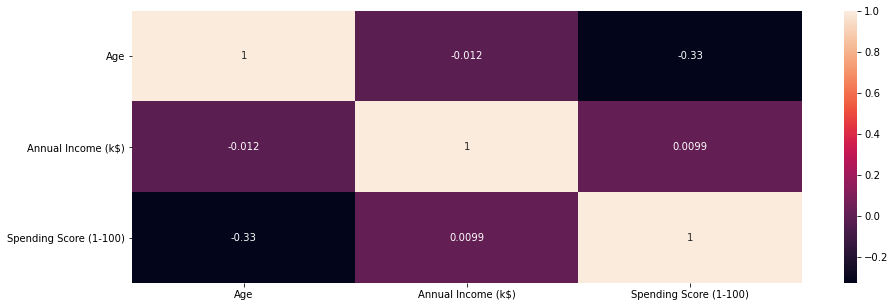

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

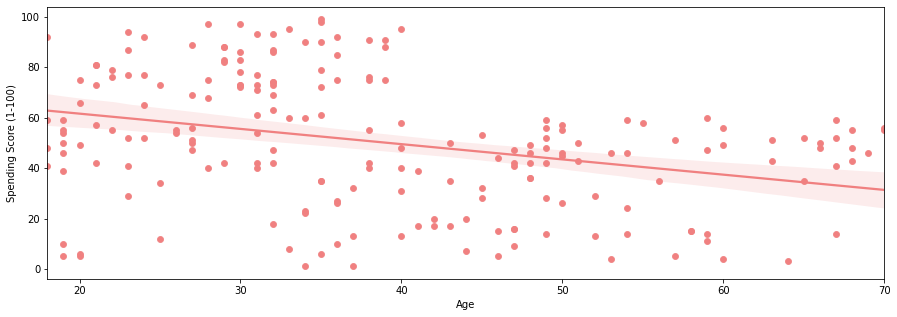

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = df, color = 'lightcoral')
sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = df, color = 'lightcoral')
plt.show()

### There is no correlation between the variables

## Clustering

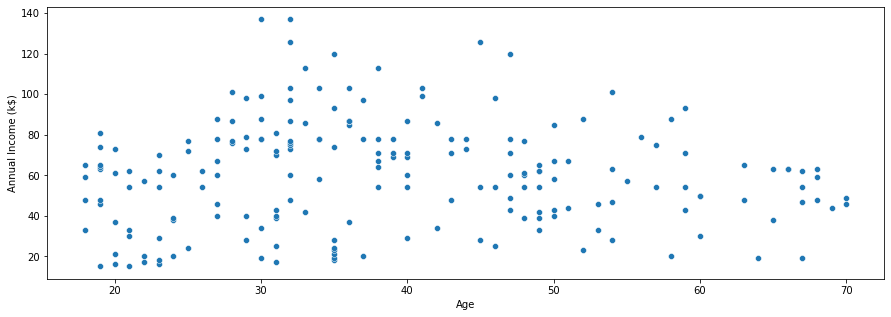

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', data = df)
plt.show()

In [17]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [19]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [32]:
X = df.iloc[:,2:4]

In [33]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\Tanaya Joshi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


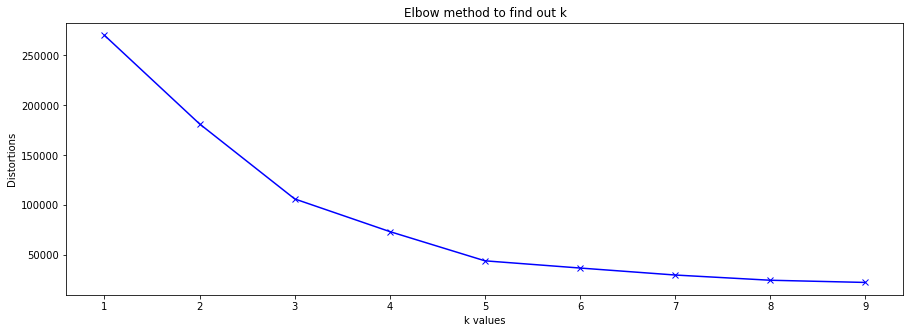

In [34]:
plt.figure(figsize=(15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel("k values")
plt.ylabel("Distortions")
plt.title("Elbow method to find out k")
plt.show()

### Hence, k = 5

In [35]:
kmeanModel = KMeans(n_clusters = 5)
kmeanModel

KMeans(n_clusters=5)

In [36]:
y_pred = kmeanModel.fit_predict(X)
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [37]:
df['Clusters'] = y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,3
1,0,21,15,81,4
2,1,20,16,6,3
3,1,23,16,77,4
4,1,31,17,40,3


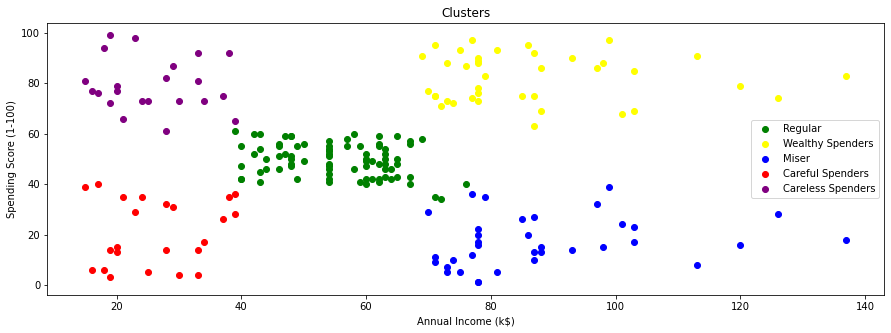

In [42]:
df1 = df[df.Clusters == 0]
df2 = df[df.Clusters == 1]
df3 = df[df.Clusters == 2]
df4 = df[df.Clusters == 3]
df5 = df[df.Clusters == 4]

plt.figure(figsize=(15,5))
plt.title("Clusters")
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color = 'green', label="Regular")
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color = 'yellow', label = "Wealthy Spenders")
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color = 'blue', label = "Miser")
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color = 'red', label="Careful Spenders")
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color = 'purple', label = "Careless Spenders")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

### Clustering shows five groups of customers who shop at the mall
### These groups are Careful Spenders - people with least income who shop the least 
### Careless Spenders - people with least income but those who shop a lot 
### Regular people with moderate income those who shop moderately 
### Miser - People with higher income yet low spending score 
### Finally, Wealthy Spender who are also the target customers with high income and high expenditure. 